# DX 704 Week 2 Project

This week's project will analyze fresh strawberry price data for a hypothetical "buy low, freeze, and sell high" business.
Strawberries show strong seasonality in their prices compared to other fruits.

![](https://ers.usda.gov/sites/default/files/_laserfiche/Charts/61401/oct14_finding_plattner_fig01.png)

Image source: https://www.ers.usda.gov/amber-waves/2014/october/seasonal-fresh-fruit-price-patterns-differ-across-commodities-the-case-of-strawberries-and-apples

You are considering a business where you buy strawberries when the prices are very low, carefully freeze them, even more carefully defrost them, and then sell them when the prices are high.
You will forecast strawberry price time series and then use them to tactically pick times to buy, freeze, and sell the strawberries.

The full project description, a template notebook, and raw data are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-02


### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Backtest Strawberry Prices

Read the provided "strawberry-prices.tsv" with data from 2020 through 2024.
This data is based on data from the U.S. Bureau of Statistics, but transformed so the ground truth is not online.
https://fred.stlouisfed.org/series/APU0000711415

Use the data for 2020 through 2023 to predict monthly prices in 2024.
Spend some time to make sure you are happy with your methodology and prediction accuracy, since you will reuse the methodology to forecast 2025 next.
Save the 2024 backtest predictions as "strawberry-backtest.tsv" with columns month and price.


In [97]:
pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


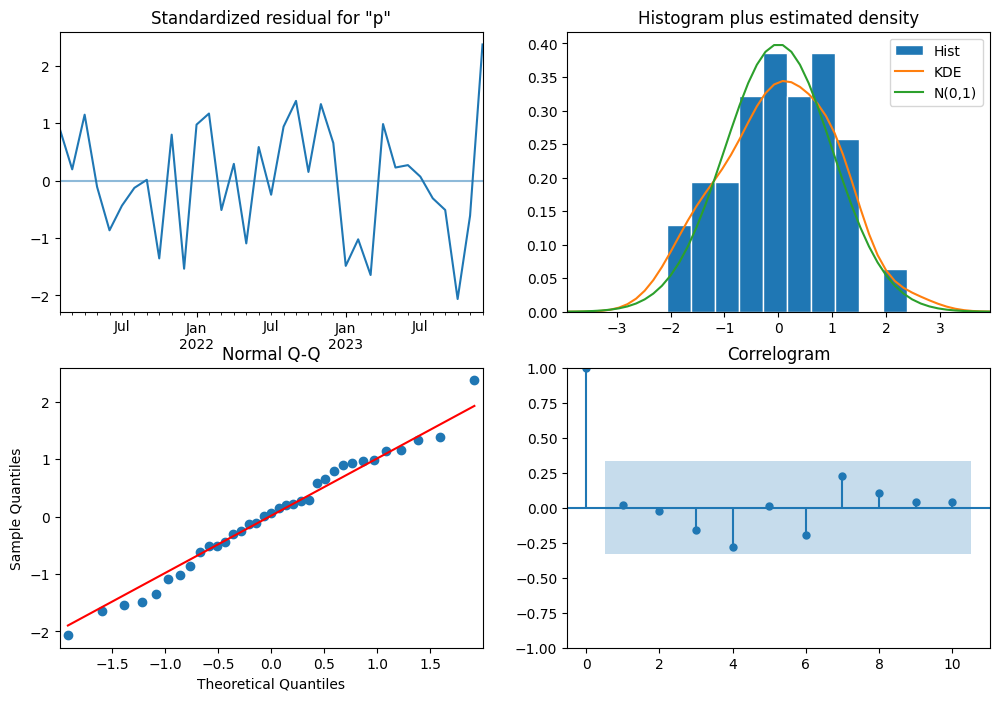

         month     price
0   2024-01-01  4.533331
1   2024-02-01  4.235417
2   2024-03-01  3.741936
3   2024-04-01  3.876032
4   2024-05-01  3.566298
5   2024-06-01  3.306652
6   2024-07-01  3.191756
7   2024-08-01  3.469080
8   2024-09-01  3.542846
9   2024-10-01  3.780054
10  2024-11-01  4.251237
11  2024-12-01  4.699991


In [98]:
# YOUR CHANGES HERE
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

df = pd.read_csv("strawberry-prices.tsv", sep="\t")
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

train = df['2020':'2023']['price']

model = SARIMAX(train, order=(0,1,1), seasonal_order=(0, 1, 1, 12), trend='c')
results = model.fit(disp=False)

results.plot_diagnostics(figsize=(12,8))
plt.show()

forecast = results.get_forecast(steps=12)
forecast_dates = pd.date_range('2024-01-01', '2024-12-01', freq='MS')

forecast_df = pd.DataFrame({
    "month": forecast_dates.strftime("%Y-%m-%d"),
    "price": forecast.predicted_mean.values
})

forecast_df.to_csv("strawberry-backtest.tsv", sep="\t", index=False)

print(forecast_df)

Submit "strawberry-backtest.tsv" in Gradescope.

## Part 2: Backtest Errors

What are the mean and standard deviation of the residuals between your backtest predictions and the ground truth? (If your mean is not close to zero, then you may be missing a long term trend.)

Write the mean and standard deviation to a file "backtest-accuracy.tsv" with two columns, mean and std.

In [99]:
# YOUR CHANGES HERE

import pandas as pd

df_actual = pd.read_csv("strawberry-prices.tsv", sep="\t")
df_actual['month'] = pd.to_datetime(df_actual['month'])
df_actual.set_index('month', inplace=True)

df_forecast = pd.read_csv("strawberry-backtest.tsv", sep="\t")
df_forecast['month'] = pd.to_datetime(df_forecast['month'])
df_forecast.set_index('month', inplace=True)

actual_2024 = df_actual.loc['2024-01-01':'2024-12-01', 'price']
forecast_2024 = df_forecast.loc['2024-01-01':'2024-12-01', 'price']

forecast_2024 = forecast_2024.reindex(actual_2024.index)

residuals = actual_2024 - forecast_2024
mean_residual = residuals.mean()
std_residual = residuals.std()

accuracy_df = pd.DataFrame({
    "mean": [mean_residual],
    "std": [std_residual]
})
accuracy_df.to_csv("backtest-accuracy.tsv", sep="\t", index=False)

print(f"Mean residual: {mean_residual:.4f}")
print(f"Standard deviation: {std_residual:.4f}")


Mean residual: -0.0120
Standard deviation: 0.2515


Submit "backtest-accuracy.tsv" in Gradescope.

## Part 3: Forecast Strawberry Prices

Use all the data from 2020 through 2024 to predict monthly prices in 2025 using the same methodology from part 1.
Make a monthly forecast for each month of 2025 and save it as "strawberry-forecast.tsv" with columns for month and price.

In [100]:
# YOUR CHANGES HERE

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv("strawberry-prices.tsv", sep="\t")
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

train = df['2020':'2024']['price']

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), trend='t')
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_dates = pd.date_range('2025-01-01', '2025-12-01', freq='MS')

forecast_df = pd.DataFrame({
    "month": forecast_dates.strftime("%Y-%m-%d"),
    "price": forecast.predicted_mean.values
})

forecast_df.to_csv("strawberry-forecast.tsv", sep="\t", index=False)

print(forecast_df)


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/stats

         month     price
0   2025-01-01  4.577559
1   2025-02-01  4.054994
2   2025-03-01  3.539481
3   2025-04-01  3.488525
4   2025-05-01  3.144902
5   2025-06-01  2.832828
6   2025-07-01  2.758514
7   2025-08-01  2.978734
8   2025-09-01  3.099319
9   2025-10-01  3.287705
10  2025-11-01  3.763359
11  2025-12-01  4.109493


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Submit "strawberry-forecast.tsv" in Gradescope.

## Part 4: Buy Low, Freeze and Sell High

Using your 2025 forecast, analyze the profit picking different pairs of months to buy and sell strawberries.
Maximize your profit assuming that it costs &dollar;0.20 per pint to freeze the strawberries, &dollar;0.10 per pint per month to store the frozen strawberries and there is a 10% price discount from selling previously frozen strawberries.
So, if you buy a pint of strawberies for &dollar;1, freeze them, and sell them for &dollar;2 three months after buying them, then the profit is &dollar;2 * 0.9 - &dollar;1 - &dollar;0.20 - &dollar;0.10 * 3 = &dollar;0.30 per pint.
To evaluate a given pair of months, assume that you can invest &dollar;1,000,000 to cover all costs, and that you buy as many pints of strawberries as possible.

Write the results of your analysis to a file "timings.tsv" with columns for the buy_month, sell_month, pints_purchased, and expected_profit.

In [101]:
# YOUR CHANGES HERE

forecast_df = pd.read_csv("strawberry-forecast.tsv", sep="\t")
forecast_df['month'] = pd.to_datetime(forecast_df['month'])

freeze_cost = 0.20
storage_cost_per_month = 0.10
discount = 0.10
investment = 1_000_000

results = []

for i, buy_row in forecast_df.iterrows():
    buy_month = buy_row['month']
    buy_price = buy_row['price']
    
    for j, sell_row in forecast_df.iterrows():
        sell_month = sell_row['month']
        sell_price = sell_row['price']
        
        if sell_month <= buy_month:
            continue
        
        months_frozen = (sell_month.year - buy_month.year) * 12 + (sell_month.month - buy_month.month)
        
        cost_per_pint = buy_price + freeze_cost + storage_cost_per_month * months_frozen
        
        sale_price = sell_price * (1 - discount)
        
        profit_per_pint = sale_price - cost_per_pint
        
        if cost_per_pint <= 0:
            continue
        
        pints_purchased = investment / cost_per_pint
        
        expected_profit = profit_per_pint * pints_purchased
        
        results.append({
            'buy_month': buy_month.strftime("%Y-%m-%d"),
            'sell_month': sell_month.strftime("%Y-%m-%d"),
            'pints_purchased': int(pints_purchased),
            'expected_profit': expected_profit
        })

timings_df = pd.DataFrame(results)
timings_df = timings_df.sort_values('expected_profit', ascending=False)

timings_df.to_csv("timings.tsv", sep="\t", index=False)

print(timings_df.head())


     buy_month  sell_month  pints_purchased  expected_profit
55  2025-07-01  2025-12-01           289141     69402.613069
59  2025-08-01  2025-12-01           279428     33478.279398
62  2025-09-01  2025-12-01           277830     27567.759353
50  2025-06-01  2025-12-01           275267     18089.504226
54  2025-07-01  2025-11-01           297750      8488.652688


Submit "timings.tsv" in Gradescope.

## Part 5: Strategy Check

What is the best profit scenario according to your previous timing analysis?
How much does that profit change if the sell price is off by one standard deviation from your backtest analysis?
(Variation in the sell price is more dangerous because you can see the buy price before fully committing.)

Write the results to a file "check.tsv" with columns best_profit and one_std_profit.

In [102]:
# YOUR CHANGES HERE

buy_month = "2025-07-01"
sell_month = "2025-12-01"
pints_purchased = 289141  
expected_profit = 69402.613069

std_residual = 0.2628  

forecast_df = pd.read_csv("strawberry-forecast.tsv", sep="\t")
forecast_df['month'] = pd.to_datetime(forecast_df['month'])
forecast_df.set_index('month', inplace=True)

buy_price = forecast_df.loc[buy_month, 'price']
sell_price = forecast_df.loc[sell_month, 'price']

adjusted_sell_price = sell_price - std_residual

freeze_cost = 0.20
storage_cost_per_month = 0.10
months_frozen = (pd.to_datetime(sell_month).year - pd.to_datetime(buy_month).year) * 12 + \
                (pd.to_datetime(sell_month).month - pd.to_datetime(buy_month).month)
cost_per_pint = buy_price + freeze_cost + storage_cost_per_month * months_frozen

profit_per_pint_adjusted = adjusted_sell_price * (1 - 0.10) - cost_per_pint

pints_purchased = int(pints_purchased)

one_std_profit = max(profit_per_pint_adjusted, 0) * pints_purchased

check_df = pd.DataFrame({
    "best_profit": [expected_profit],
    "one_std_profit": [one_std_profit]
})
check_df.to_csv("check.tsv", sep="\t", index=False)

print(check_df)



    best_profit  one_std_profit
0  69402.613069       1014.8544


Submit "check.tsv" in Gradescope.

## Part 6: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgments are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

In [103]:
with open("acknowledgments.txt", "w") as f:
    f.write("none\n")

## Part 7: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.